In [1]:
import tensorflow as tf
h = tf.constant("Hello")
w = tf.constant(" World!")
hw = h + w
with tf.Session() as sess:
    ans = sess.run(hw)
print(ans)

b'Hello World!'


# operators

# Data Types

# operation

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
tf.__version__

'1.12.0'

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_trai, y_trai), (x_test, y_test) = mnist.load_data()

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
y_trai=np.eye(10,dtype=float)[y_trai]
y_test=np.eye(10,dtype=float)[y_test]
x_trai=x_trai/255.0
x_test=x_test/255.0

In [8]:
y_trai.shape

(60000, 10)

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
x_train,x_val,y_train,y_val=train_test_split(x_trai,y_trai,test_size = 0.081,random_state=256)

In [11]:
x_train.shape

(55140, 28, 28)

In [12]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(list(cls_true[i]).index(1))
        else:

            xlabel = "True: {0}, Pred: {1}".format(list(cls_true[i]).index(1),cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()



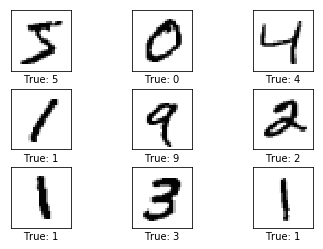

In [13]:
plot_images(images=x_trai[0:9],cls_true=y_trai[0:9])

In [14]:
x = tf.placeholder(tf.float32, [None, 784])

In [15]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [16]:
y_true_cls = tf.placeholder(tf.int64, [None])

In [17]:
weights = tf.Variable(tf.zeros([784, 10]))

In [18]:
biases = tf.Variable(tf.zeros([10]))

In [19]:
logits = tf.matmul(x, weights) + biases

In [20]:
y_pred = tf.nn.softmax(logits)

In [21]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [22]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)

In [23]:
cost = tf.reduce_mean(cross_entropy)

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [25]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
session = tf.Session()
session.run(tf.global_variables_initializer())
batch_size = 100


In [28]:
import time
def optimize(num_iterations):
    for i in range(num_iterations):
        
        idx = np.random.randint(low=0, high=x_train.shape[0], size=batch_size)
        
        x_batch = [x.flatten() for x in x_train[idx]]
        y_true_batch=y_train[idx]
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        plot_weights()
        time.sleep(3)

In [29]:
feed_dict_test = {x: [x.flatten() for x in x_test],
                  y_true: y_test,
                  y_true_cls: [list(y).index(1) for y in y_test]}

In [30]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))



In [31]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.y_test_cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


In [32]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_test[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [33]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(28,28)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


In [34]:
print_accuracy()

Accuracy on test-set: 9.8%


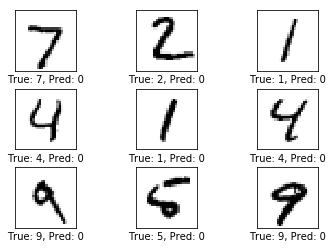

In [35]:
plot_example_errors()

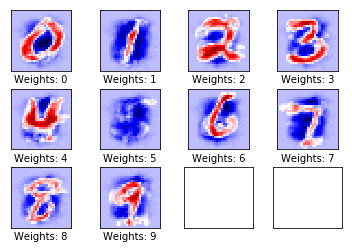

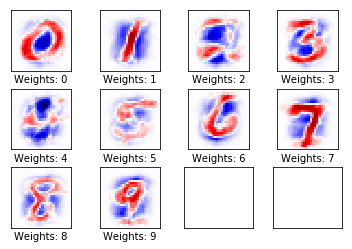

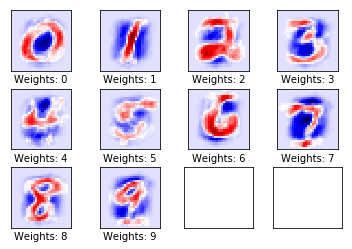

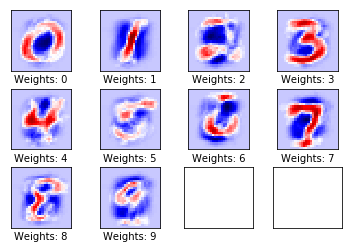

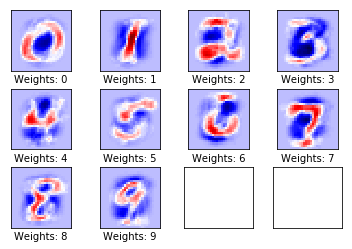

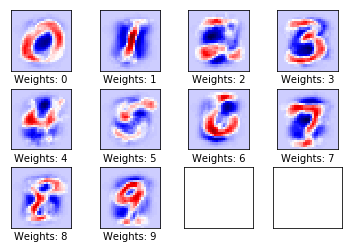

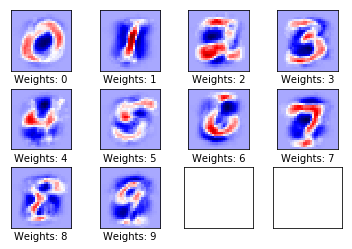

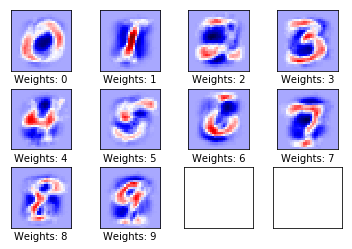

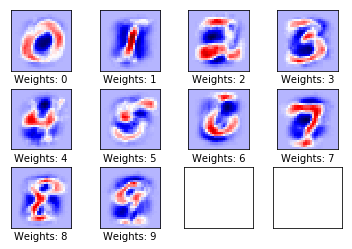

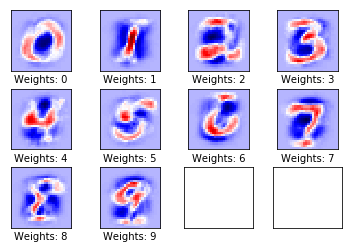

In [36]:
optimize(num_iterations=10)

In [37]:
print_accuracy()

Accuracy on test-set: 75.2%


In [ ]:
plot_example_errors()

In [ ]:
plot_weights()